
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [34]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import *

## Data Importing

In [35]:

file_name = 'AK_Juneau_0.json'  
data_dir = '../data/'
file_path = os.path.join(data_dir, file_name)

# Load  JSON
with open(file_path, 'r') as f:
    data_sample = json.load(f)


pprint(data_sample)

# load one file first to see what type of data you're dealing with and what attributes it has

first_sale = data_sample.get("data", {}).get("results", [])[0]

#branding_type = first_sale.get("branding", []).get("type")
branding_type = first_sale.get("branding", [])[0]
property_name = branding_type.get("name", {})
property_type = branding_type.get("type", {})
property_description = first_sale.get("description", {})
property_flags = first_sale.get("flags", {})
price_reduced_amount = first_sale.get("price_reduced_amount", {})
property_id = first_sale.get("property_id", {})
list_price = first_sale.get("list_price", {})
listing_id = first_sale.get("listing_id", {})
address_details = first_sale.get("location", {}).get("address", {})
#description = first_sale.get("description")

print(property_name, property_type, property_description, property_flags)


{'data': {'count': 8,
          'results': [{'branding': [{'name': 'EXP Realty LLC - Southeast '
                                             'Alaska',
                                     'photo': None,
                                     'type': 'Office'}],
                       'community': None,
                       'description': {'baths': 2,
                                       'baths_1qtr': None,
                                       'baths_3qtr': None,
                                       'baths_full': 2,
                                       'baths_half': None,
                                       'beds': 3,
                                       'garage': 1,
                                       'lot_sqft': 10454,
                                       'name': None,
                                       'sold_date': '2023-09-18',
                                       'sold_price': None,
                                       'sqft': 1821,
                      

In [36]:
# loop over all files and save the raw data to cvs for inspection

data_dir = '../data/'
all_sales = []

# Loop through and collect all property listings
for file in os.listdir(data_dir):
    if file.endswith('.json'):
        with open(os.path.join(data_dir, file), 'r') as f:
            try:
                data = json.load(f)
                results = data.get('data', {}).get('results', [])
                all_sales.extend(results)
            except Exception as e:
                print(f"Error loading {file}: {e}")

print(f"Total sales loaded: {len(all_sales)}")

# Flatten JSON structure
raw_df = pd.json_normalize(all_sales)
raw_df.to_csv('../data/housing_raw.csv', index=False)

Total sales loaded: 8159


In [37]:
# loop over all files and put them into a dataframe
 
all_records = []

# Loop through JSON files
for file in os.listdir(data_dir):
    if file.endswith(".json"):
        with open(os.path.join(data_dir, file), "r") as f:
            try:
                data = json.load(f)
                results = data.get("data", {}).get("results", [])
                
                for sale in results:
                    branding = sale.get("branding", [{}])[0]
                    full_location = sale.get("location", {}) or {}
                    address = full_location.get("address", {}) or {}
                    coordinates = address.get("coordinate", {})  or {}
                    county = full_location.get("county", {}) or {}

                    record = {
                        "property_name": branding.get("name"),
                        "property_type": branding.get("type"),
                        "baths": sale.get("description").get("baths"),
                        "baths_1qtr": sale.get("description").get("baths_1qtr"),
                        "baths_3qtr": sale.get("description").get("baths_3qtr"),
                        "baths_full": sale.get("description").get("baths_full"),
                        "baths_half": sale.get("description").get("baths_half"),
                        "beds": sale.get("description").get("beds"),
                        "garage": sale.get("description").get("garage"),
                        "lot_sqft": sale.get("description").get("lot_sqft"),
                        "name": sale.get("description").get("name"),
                        "sold_date": sale.get("description").get("sold_date"),
                        "sold_price": sale.get("description").get("sold_price"),
                        "sqft": sale.get("description").get("sqft"),
                        "stories": sale.get("description").get("stories"),
                        "sub_type": sale.get("description").get("sub_type"),
                        "type": sale.get("description").get("type"),
                        "year_built": sale.get("description").get("year_built"),
                        "is_foreclosure": sale.get("flags").get("is_foreclosure"),
                        "is_price_reduced": sale.get("flags").get("is_price_reduced"),
                        "is_new_listing": sale.get("flags").get("is_new_listing"),
                        "is_new_construction": sale.get("flags").get("is_new_construction"),
                        "price_reduced_amount": sale.get("price_reduced_amount"),
                        "property_id": sale.get("property_id"),
                        "list_price": sale.get("list_price"),
                        "listing_id": sale.get("listing_id"),
                        "list_date": sale.get("list_date"),
                        "street_address": address.get("line"),
                        "city": address.get("city"),
                        "state": address.get("state_code"),
                        "country": address.get("country"),
                        "county_name": county.get("name"),
                        "postal_code": address.get("postal_code"),
                        "latitude": coordinates.get("lat"),
                        "longitude": coordinates.get("lon"),
                    }

                    all_records.append(record)

            except Exception as e:
                print(f"Error loading {file}: {e}")

# Convert to DataFrame
df = pd.DataFrame(all_records)

# Save to CSV
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/property_listings_flat.csv", index=False)

print("✅ Finished! Saved to data/processed/property_listings_flat.csv")


✅ Finished! Saved to data/processed/property_listings_flat.csv


In [38]:
df

,property_name,property_type,baths,baths_1qtr,baths_3qtr,baths_full,baths_half,beds,garage,lot_sqft,...,listing_id,list_date,street_address,city,state,country,county_name,postal_code,latitude,longitude
0,EXP Realty LLC - Southeast Alaska,Office,2.0,None,NaN,2.0,NaN,3.0,1.0,10454.0,...,2957241843,2023-06-29T21:16:25.000000Z,9453 Herbert Pl,Juneau,AK,None,Juneau,99801,58.363950,-134.593720
1,None,Office,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,8477 Thunder Mountain Rd,Juneau,AK,None,Juneau,99801,NaN,NaN
2,None,Office,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,4515 Glacier Hwy,Juneau,AK,None,Juneau,99801,NaN,NaN
3,None,Office,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,17850 Point Stephens Rd,Juneau,AK,None,Juneau,99801,NaN,NaN
4,None,Office,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,9951 Stephen Richards Memorial Dr,Juneau,AK,None,Juneau,99801,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,Joe R. Pyle Complete Auction And Realty Service,Office,1.0,None,NaN,1.0,NaN,3.0,1.0,4792.0,...,2954257214,2023-04-05T19:28:04Z,1008 Oakmont Rd,Charleston,WV,None,Kanawha,25314,38.341576,-81.644994
8155,Joe R. Pyle Complete Auction And Realty Service,Office,1.0,None,NaN,1.0,NaN,3.0,NaN,7841.0,...,2956178043,2023-05-28T02:25:28Z,1041 Temple St,Charleston,WV,None,Kanawha,25387,38.377371,-81.661662
8156,Joe R. Pyle Complete Auction And Realty Service,Office,1.0,None,NaN,1.0,NaN,3.0,NaN,65340.0,...,2951731627,2023-01-24T18:27:46Z,238 Oakwood Rd,Charleston,WV,None,Kanawha,25314,38.338617,-81.659885
8157,Joe R. Pyle Complete Auction And Realty Service,Office,0.0,None,NaN,NaN,NaN,0.0,NaN,NaN,...,2953862293,2023-03-24T12:27:42Z,408 Lee St W,Charleston,WV,None,Kanawha,25302,38.363038,-81.644214


## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [39]:
# load and concatenate data here

df = pd.read_csv(r"../data/processed/property_listings_flat.csv")
df.head()
df.info()

# drop or replace values as necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_name         7725 non-null   object 
 1   property_type         8159 non-null   object 
 2   baths                 7980 non-null   float64
 3   baths_1qtr            0 non-null      float64
 4   baths_3qtr            566 non-null    float64
 5   baths_full            7311 non-null   float64
 6   baths_half            2281 non-null   float64
 7   beds                  7504 non-null   float64
 8   garage                4448 non-null   float64
 9   lot_sqft              6991 non-null   float64
 10  name                  0 non-null      float64
 11  sold_date             8159 non-null   object 
 12  sold_price            6716 non-null   float64
 13  sqft                  7323 non-null   float64
 14  stories               6260 non-null   float64
 15  sub_type             

In [40]:
df.describe()

,baths,baths_1qtr,baths_3qtr,baths_full,baths_half,beds,garage,lot_sqft,name,sold_price,...,year_built,is_new_construction,price_reduced_amount,property_id,list_price,listing_id,country,postal_code,latitude,longitude
count,7980.000000,0.0,566.000000,7311.000000,2281.000000,7504.000000,4448.000000,6.991000e+03,0.0,6.716000e+03,...,7316.000000,0.0,2.484000e+03,8.159000e+03,7.721000e+03,7.752000e+03,0.0,8159.000000,7909.000000,7909.000000
mean,2.131203,NaN,1.247350,1.887430,1.105655,3.208289,1.926709,2.510949e+05,NaN,4.126050e+05,...,1968.916074,NaN,2.442704e+04,5.755508e+09,4.341582e+05,2.957819e+09,NaN,50946.997181,39.009689,-92.206522
std,1.175940,NaN,0.463482,0.862214,0.413340,1.282732,0.878766,5.823820e+06,NaN,6.994308e+05,...,35.096914,NaN,7.162396e+04,2.687366e+09,5.514925e+05,7.541620e+07,NaN,29257.110670,4.374553,15.888886
min,0.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,NaN,3.080000e+02,...,1828.000000,NaN,1.000000e+02,1.003443e+09,1.000000e+00,6.052327e+08,NaN,2111.000000,21.277707,-157.810583
25%,1.000000,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,4.953000e+03,NaN,1.910000e+05,...,1950.000000,NaN,6.000000e+03,3.307743e+09,2.090000e+05,2.959499e+09,NaN,25314.000000,35.688084,-104.971611
50%,2.000000,NaN,1.000000,2.000000,1.000000,3.000000,2.000000,7.841000e+03,NaN,3.140000e+05,...,1975.000000,NaN,1.010000e+04,6.000993e+09,3.250000e+05,2.960836e+09,NaN,50310.000000,39.698210,-89.333131
75%,3.000000,NaN,1.000000,2.000000,1.000000,4.000000,2.000000,1.263200e+04,NaN,4.700000e+05,...,1997.000000,NaN,2.000000e+04,8.169927e+09,4.999000e+05,2.961805e+09,NaN,78739.000000,41.832266,-78.617690
max,9.000000,NaN,3.000000,8.000000,5.000000,12.000000,11.000000,1.676624e+08,NaN,2.706500e+07,...,2024.000000,NaN,2.015999e+06,9.993679e+09,1.250000e+07,2.963230e+09,NaN,99801.000000,58.396178,-71.006343


In [41]:
df.isna().sum()

property_name            434
property_type              0
baths                    179
baths_1qtr              8159
baths_3qtr              7593
baths_full               848
baths_half              5878
beds                     655
garage                  3711
lot_sqft                1168
name                    8159
sold_date                  0
sold_price              1443
sqft                     836
stories                 1899
sub_type                6732
type                      34
year_built               843
is_foreclosure          8117
is_price_reduced        5675
is_new_listing           407
is_new_construction     8159
price_reduced_amount    5675
property_id                0
list_price               438
listing_id               407
list_date                407
street_address            15
city                       5
state                      0
country                 8159
county_name               10
postal_code                0
latitude                 250
longitude     

In [42]:
# calls a function that deletes a column if all values are null

df_without_null_col = drop_all_null_columns(df)

df_without_null_col.describe()
df_without_null_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_name         7725 non-null   object 
 1   property_type         8159 non-null   object 
 2   baths                 7980 non-null   float64
 3   baths_3qtr            566 non-null    float64
 4   baths_full            7311 non-null   float64
 5   baths_half            2281 non-null   float64
 6   beds                  7504 non-null   float64
 7   garage                4448 non-null   float64
 8   lot_sqft              6991 non-null   float64
 9   sold_date             8159 non-null   object 
 10  sold_price            6716 non-null   float64
 11  sqft                  7323 non-null   float64
 12  stories               6260 non-null   float64
 13  sub_type              1427 non-null   object 
 14  type                  8125 non-null   object 
 15  year_built           

In [43]:
df_modified = fill_missing_with_mean(df_without_null_col, columns=["beds", "baths", "garage", "lot_sqft","sqft"])
df_modified


c:\Users\ipeko\Documents\Lighthouse\Midterm\DS_Midterm_Project\notebooks\functions_variables.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].apply(lambda col: col.fillna(col.mean()))


,property_name,property_type,baths,baths_3qtr,baths_full,baths_half,beds,garage,lot_sqft,sold_date,...,list_price,listing_id,list_date,street_address,city,state,county_name,postal_code,latitude,longitude
0,EXP Realty LLC - Southeast Alaska,Office,2.000000,NaN,2.0,NaN,3.000000,1.000000,10454.000000,2023-09-18,...,554950.0,2.957242e+09,2023-06-29T21:16:25.000000Z,9453 Herbert Pl,Juneau,AK,Juneau,99801,58.363950,-134.593720
1,NaN,Office,2.131203,NaN,NaN,NaN,3.208289,1.926709,251094.946789,2023-08-22,...,NaN,NaN,NaN,8477 Thunder Mountain Rd,Juneau,AK,Juneau,99801,NaN,NaN
2,NaN,Office,2.131203,NaN,NaN,NaN,3.208289,1.926709,251094.946789,2023-08-22,...,NaN,NaN,NaN,4515 Glacier Hwy,Juneau,AK,Juneau,99801,NaN,NaN
3,NaN,Office,2.131203,NaN,NaN,NaN,3.208289,1.926709,251094.946789,2023-08-21,...,NaN,NaN,NaN,17850 Point Stephens Rd,Juneau,AK,Juneau,99801,NaN,NaN
4,NaN,Office,2.131203,NaN,NaN,NaN,3.208289,1.926709,251094.946789,2023-08-21,...,NaN,NaN,NaN,9951 Stephen Richards Memorial Dr,Juneau,AK,Juneau,99801,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,Joe R. Pyle Complete Auction And Realty Service,Office,1.000000,NaN,1.0,NaN,3.000000,1.000000,4792.000000,2023-07-27,...,98000.0,2.954257e+09,2023-04-05T19:28:04Z,1008 Oakmont Rd,Charleston,WV,Kanawha,25314,38.341576,-81.644994
8155,Joe R. Pyle Complete Auction And Realty Service,Office,1.000000,NaN,1.0,NaN,3.000000,1.926709,7841.000000,2023-07-27,...,49999.0,2.956178e+09,2023-05-28T02:25:28Z,1041 Temple St,Charleston,WV,Kanawha,25387,38.377371,-81.661662
8156,Joe R. Pyle Complete Auction And Realty Service,Office,1.000000,NaN,1.0,NaN,3.000000,1.926709,65340.000000,2023-07-24,...,133000.0,2.951732e+09,2023-01-24T18:27:46Z,238 Oakwood Rd,Charleston,WV,Kanawha,25314,38.338617,-81.659885
8157,Joe R. Pyle Complete Auction And Realty Service,Office,0.000000,NaN,NaN,NaN,0.000000,1.926709,251094.946789,2023-07-24,...,75000.0,2.953862e+09,2023-03-24T12:27:42Z,408 Lee St W,Charleston,WV,Kanawha,25302,38.363038,-81.644214


### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [44]:
# OHE categorical variables/ tags here
# tags will have to be done manually

from functions_variables import get_tag_counts

tag_counts = get_tag_counts(raw_df)

print(f"Number of unique tags: {len(tag_counts)}")

# Show top 20 tags
print(tag_counts.most_common(20))

top_20_tags = [tag for tag, count in tag_counts.most_common(20)]

for tag in top_20_tags:
    df_modified[f"tag_{tag}"] = raw_df["tags"].apply(lambda x: int(tag in x) if isinstance(x, list) else 0)


df_modified.to_csv("../data/processed/property_listings_with_tags.csv", index=False)

# df_modified.describe()
df_modified.info()

C:\Users\ipeko\AppData\Local\Temp\ipykernel_21356\2882055035.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified[f"tag_{tag}"] = raw_df["tags"].apply(lambda x: int(tag in x) if isinstance(x, list) else 0)


Number of unique tags: 155
[('garage_1_or_more', 4749), ('central_air', 4229), ('dishwasher', 3704), ('community_outdoor_space', 3585), ('fireplace', 3426), ('basement', 3363), ('single_story', 3354), ('garage_2_or_more', 3264), ('forced_air', 3207), ('two_or_more_stories', 3088), ('hardwood_floors', 2476), ('washer_dryer', 2252), ('laundry_room', 2248), ('recreation_facilities', 1942), ('shopping', 1894), ('community_security_features', 1615), ('view', 1602), ('central_heat', 1496), ('dining_room', 1450), ('family_room', 1186)]


C:\Users\ipeko\AppData\Local\Temp\ipykernel_21356\2882055035.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified[f"tag_{tag}"] = raw_df["tags"].apply(lambda x: int(tag in x) if isinstance(x, list) else 0)
C:\Users\ipeko\AppData\Local\Temp\ipykernel_21356\2882055035.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified[f"tag_{tag}"] = raw_df["tags"].apply(lambda x: int(tag in x) if isinstance(x, list) else 0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_name                    7725 non-null   object 
 1   property_type                    8159 non-null   object 
 2   baths                            8159 non-null   float64
 3   baths_3qtr                       566 non-null    float64
 4   baths_full                       7311 non-null   float64
 5   baths_half                       2281 non-null   float64
 6   beds                             8159 non-null   float64
 7   garage                           8159 non-null   float64
 8   lot_sqft                         8159 non-null   float64
 9   sold_date                        8159 non-null   object 
 10  sold_price                       6716 non-null   float64
 11  sqft                             8159 non-null   float64
 12  stories             

In [45]:
print(df_modified.columns.tolist())

['property_name', 'property_type', 'baths', 'baths_3qtr', 'baths_full', 'baths_half', 'beds', 'garage', 'lot_sqft', 'sold_date', 'sold_price', 'sqft', 'stories', 'sub_type', 'type', 'year_built', 'is_foreclosure', 'is_price_reduced', 'is_new_listing', 'price_reduced_amount', 'property_id', 'list_price', 'listing_id', 'list_date', 'street_address', 'city', 'state', 'county_name', 'postal_code', 'latitude', 'longitude', 'tag_garage_1_or_more', 'tag_central_air', 'tag_dishwasher', 'tag_community_outdoor_space', 'tag_fireplace', 'tag_basement', 'tag_single_story', 'tag_garage_2_or_more', 'tag_forced_air', 'tag_two_or_more_stories', 'tag_hardwood_floors', 'tag_washer_dryer', 'tag_laundry_room', 'tag_recreation_facilities', 'tag_shopping', 'tag_community_security_features', 'tag_view', 'tag_central_heat', 'tag_dining_room', 'tag_family_room']


In [46]:
columns_to_drop = [
    'property_id', 'listing_id', 'street_address',
    'property_name', 'property_type',
    'county_name', 'sold_date', ]

df_cleaned = drop_columns(df_modified, columns_to_drop)

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [47]:
# perform train test split here

from sklearn.model_selection import train_test_split

# Drop rows with missing target values
df_encoded = df_cleaned.dropna(subset=["sold_price"])

# Train-test split (80/20)
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)



# do something with state and city

city_target_mean = train_df.groupby("city")["sold_price"].mean()

# Map means to city
train_df["city_encoded"] = train_df["city"].map(city_target_mean)



# For test set: map, and fill unknown cities with overall train mean
# It's a fallback in case the test set has cities that don’t exist in the training set.
overall_mean = train_df["sold_price"].mean()
test_df["city_encoded"] = test_df["city"].map(city_target_mean).fillna(overall_mean)



#same process for state
state_target_mean = train_df.groupby("state")["sold_price"].mean()
train_df["state_encoded"] = train_df["state"].map(state_target_mean)
test_df["state_encoded"] = test_df["state"].map(state_target_mean).fillna(overall_mean)

# drop city and state
train_df = drop_columns(train_df, ["city", "state"])
test_df = drop_columns(test_df, ["city", "state"])

In [48]:
train_df

,baths,baths_3qtr,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,...,tag_laundry_room,tag_recreation_facilities,tag_shopping,tag_community_security_features,tag_view,tag_central_heat,tag_dining_room,tag_family_room,city_encoded,state_encoded
2547,1.000000,NaN,1.0,NaN,3.0,1.000000,6534.000000,165900.0,1044.000000,1.0,...,0,1,0,0,1,0,0,0,250034.312500,247472.500000
1283,3.000000,NaN,3.0,NaN,6.0,1.926709,6098.000000,303000.0,2315.000000,NaN,...,1,0,0,0,1,1,0,0,321316.071429,321316.071429
7359,2.000000,NaN,1.0,1.0,3.0,1.926709,21371.000000,450000.0,1536.000000,2.0,...,0,0,0,0,0,0,1,0,468015.250000,414099.686391
6741,0.000000,NaN,NaN,NaN,0.0,1.926709,251094.946789,53591.0,1933.848559,NaN,...,0,0,0,0,0,0,0,0,199041.072072,208596.073770
4555,3.000000,NaN,3.0,NaN,3.0,2.000000,4356.000000,421480.0,2309.000000,1.0,...,0,0,0,0,1,0,0,0,610252.471264,610252.471264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,3.000000,2.0,1.0,NaN,3.0,2.000000,5227.000000,269000.0,1796.000000,2.0,...,0,0,1,0,0,0,0,1,309086.645963,309086.645963
6214,2.000000,NaN,2.0,NaN,3.0,2.000000,4791.000000,347000.0,1276.000000,1.0,...,0,0,1,0,0,0,1,0,432595.187879,432595.187879
6249,2.131203,NaN,NaN,NaN,3.0,1.926709,871.000000,106000.0,1478.000000,NaN,...,0,0,0,0,0,0,1,0,236711.163522,236711.163522
6413,2.131203,NaN,NaN,NaN,3.0,1.926709,871.000000,106000.0,1478.000000,NaN,...,0,0,0,0,0,0,1,0,236711.163522,236711.163522


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [49]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [50]:
# perform EDA here

numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Set threshold for high correlation
threshold = 0.7

# Find high correlation pairs (excluding self-correlations)
high_corr_pairs = (
    corr_matrix.abs()
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Filter to only include high correlations above threshold
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs < 1) & (high_corr_pairs >= threshold)
]

print("High Correlation Pairs:")
print(high_corr_pairs)

High Correlation Pairs:
list_price        sold_price                 0.987335
postal_code       longitude                  0.934978
stories           tag_two_or_more_stories    0.818249
tag_single_story  stories                    0.803512
baths_full        baths                      0.795361
lot_sqft          price_reduced_amount       0.718878
dtype: float64


These features are highly correlated:

list_price is almost the same as sold_price, so keeping both is redundant.

postal_code & longitude encode similar location info.

stories vs tag_two_or_more_stories – the binary tag captures the same info.

baths vs baths_full – highly overlapping counts.

lot_sqft vs price_reduced_amount – may be related to house size affecting discounts.

In [51]:
columns_to_drop_multicollinearity = [
    'list_price', 'postal_code', 'tag_two_or_more_stories', 'tag_garage_2_or_more',  
    'baths_full', 'price_reduced_amount', 'baths_3qtr','baths_full', 'baths_half', 'tag_single_story', 'city', 'state']

new_df_cleaned = drop_columns(df_cleaned, columns_to_drop_multicollinearity)

In [52]:
print(new_df_cleaned.columns.tolist())

['baths', 'beds', 'garage', 'lot_sqft', 'sold_price', 'sqft', 'stories', 'sub_type', 'type', 'year_built', 'is_foreclosure', 'is_price_reduced', 'is_new_listing', 'list_date', 'latitude', 'longitude', 'tag_garage_1_or_more', 'tag_central_air', 'tag_dishwasher', 'tag_community_outdoor_space', 'tag_fireplace', 'tag_basement', 'tag_forced_air', 'tag_hardwood_floors', 'tag_washer_dryer', 'tag_laundry_room', 'tag_recreation_facilities', 'tag_shopping', 'tag_community_security_features', 'tag_view', 'tag_central_heat', 'tag_dining_room', 'tag_family_room']


### Remove Tag Columns for Visualization but will Keep Them for the Model
For Visualization:

-Tags are binary/one-hot encoded features (0s and 1s), which don’t add much insight when visualizing correlations (they tend to have low variance).

-Including many binary columns makes the heatmap/pairplot cluttered and less informative.

-Removing them helps focusing on numeric features like sqft, beds, baths, price, etc.

For Modeling:

-Tags likely contain valuable information about the property (like amenities, features) that may help predict price.

-Feature selection or regularization (e.g., LASSO, tree-based models) can handle unimportant tags automatically during model training.

-Removing them before modeling may lose valuable predictive information.



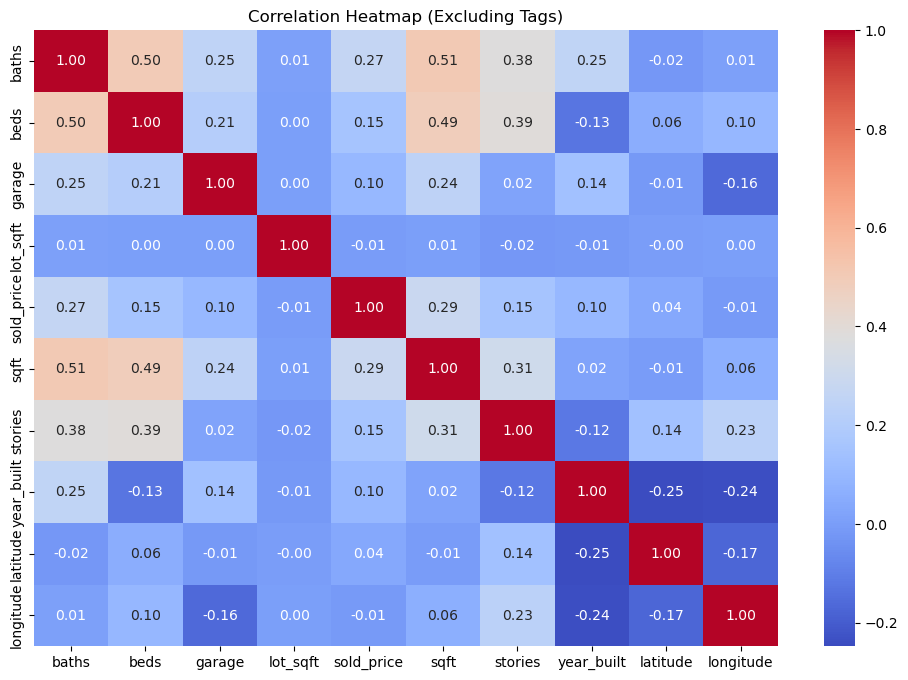

In [53]:
# Create a version of the DataFrame without tag columns for visualization
tag_columns = [col for col in new_df_cleaned.columns if col.startswith("tag_")]
df_no_tags = new_df_cleaned.drop(columns=tag_columns)

# Generate correlation heatmap for numeric columns excluding tags
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_no_tags.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Excluding Tags)")
plt.show()

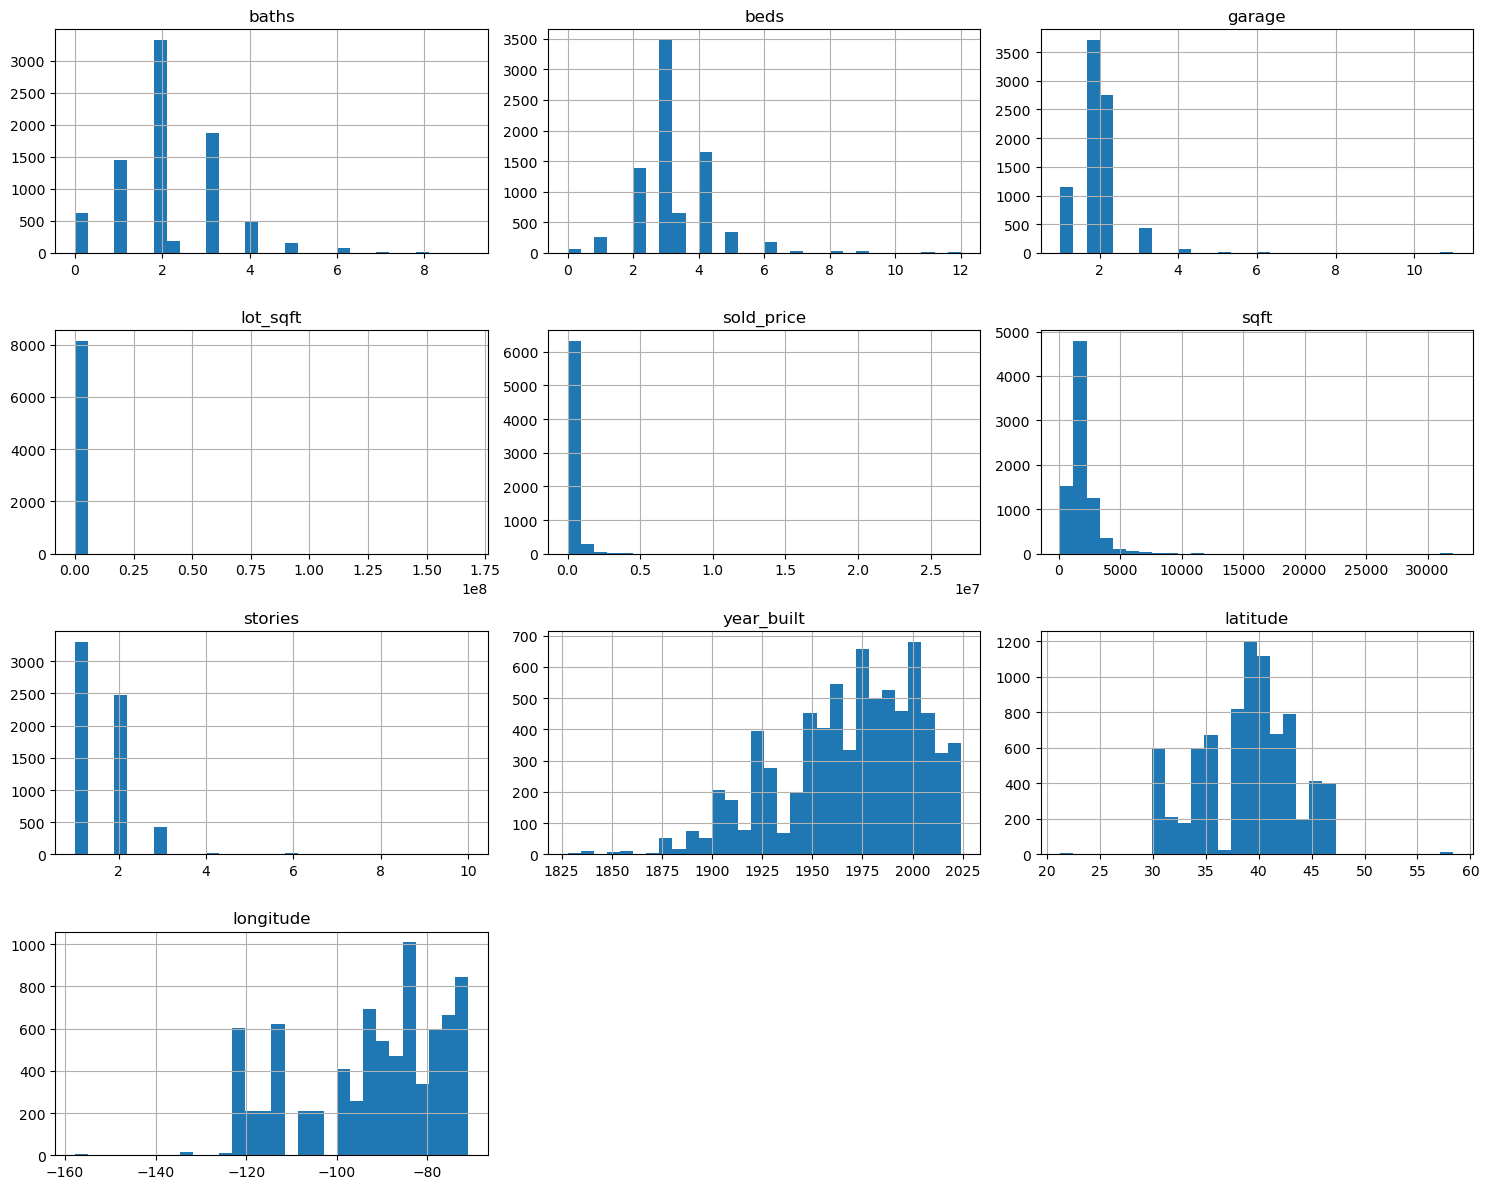

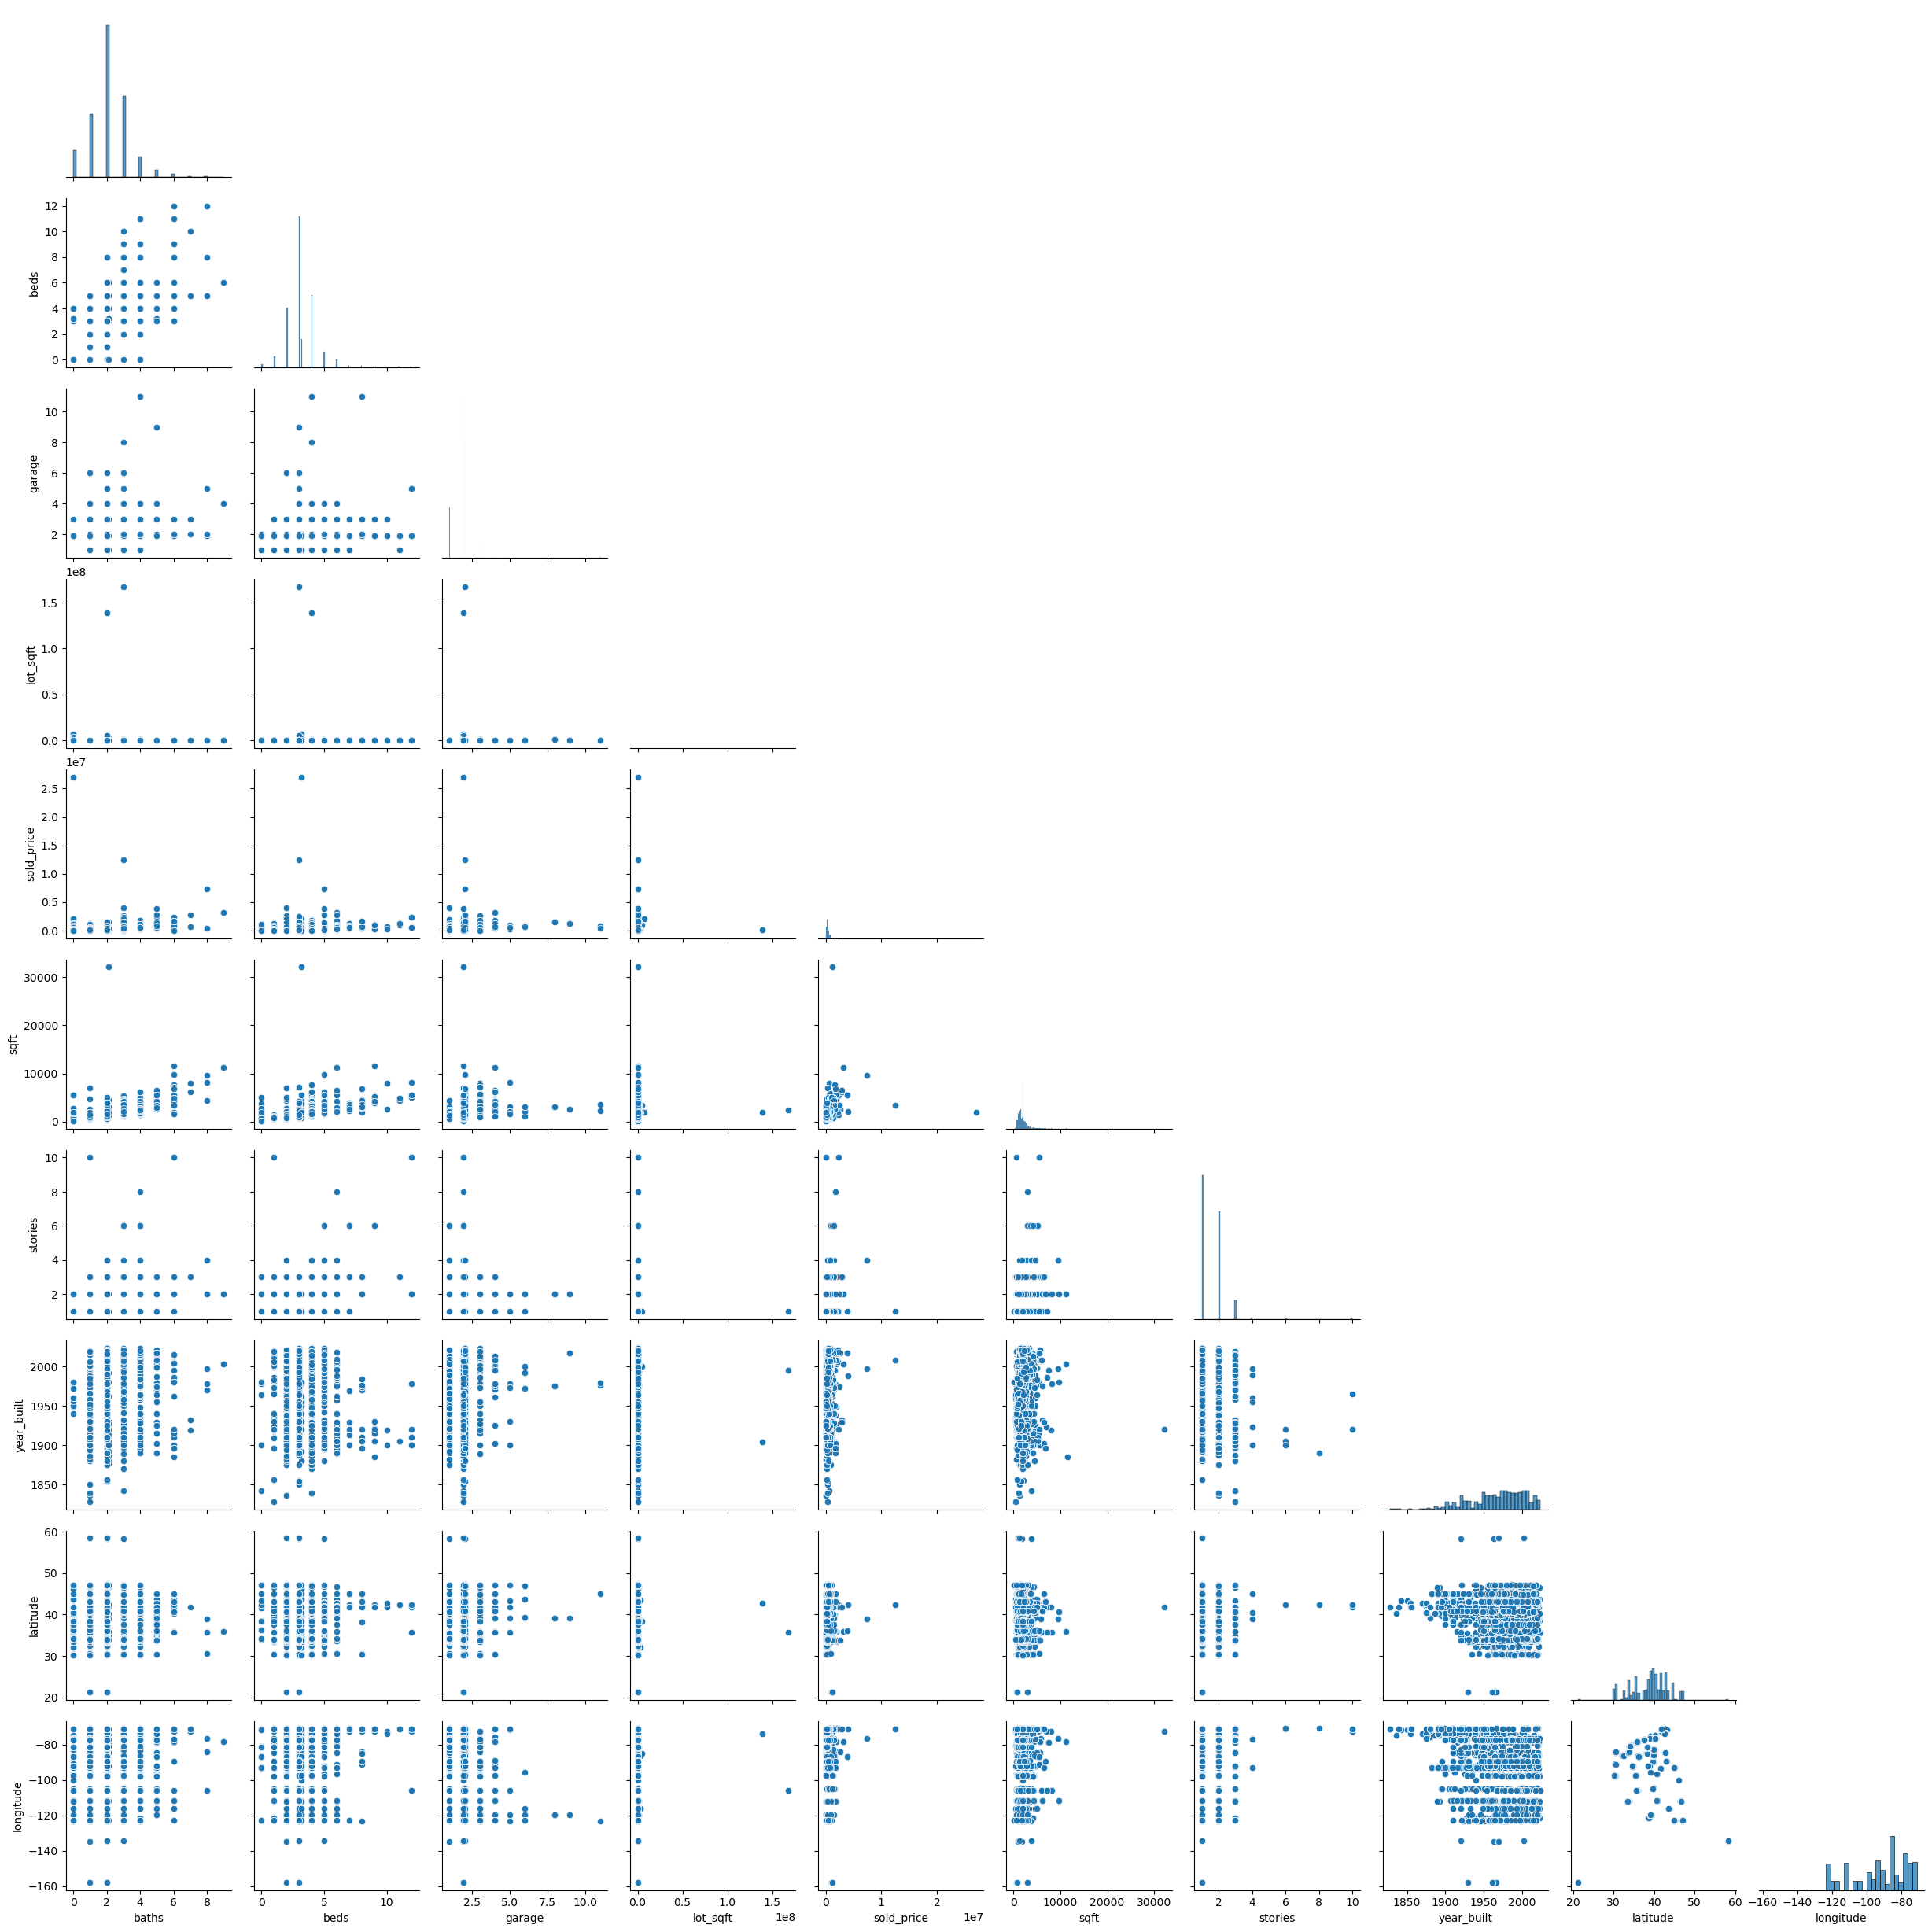

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_no_tags.select_dtypes(include=['number']).columns
numeric_df = df_no_tags.select_dtypes(include=['number'])

# Plot histograms for all numeric columns
df_no_tags[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

#pairplot
sns.pairplot(numeric_df, corner=True)

plt.show()

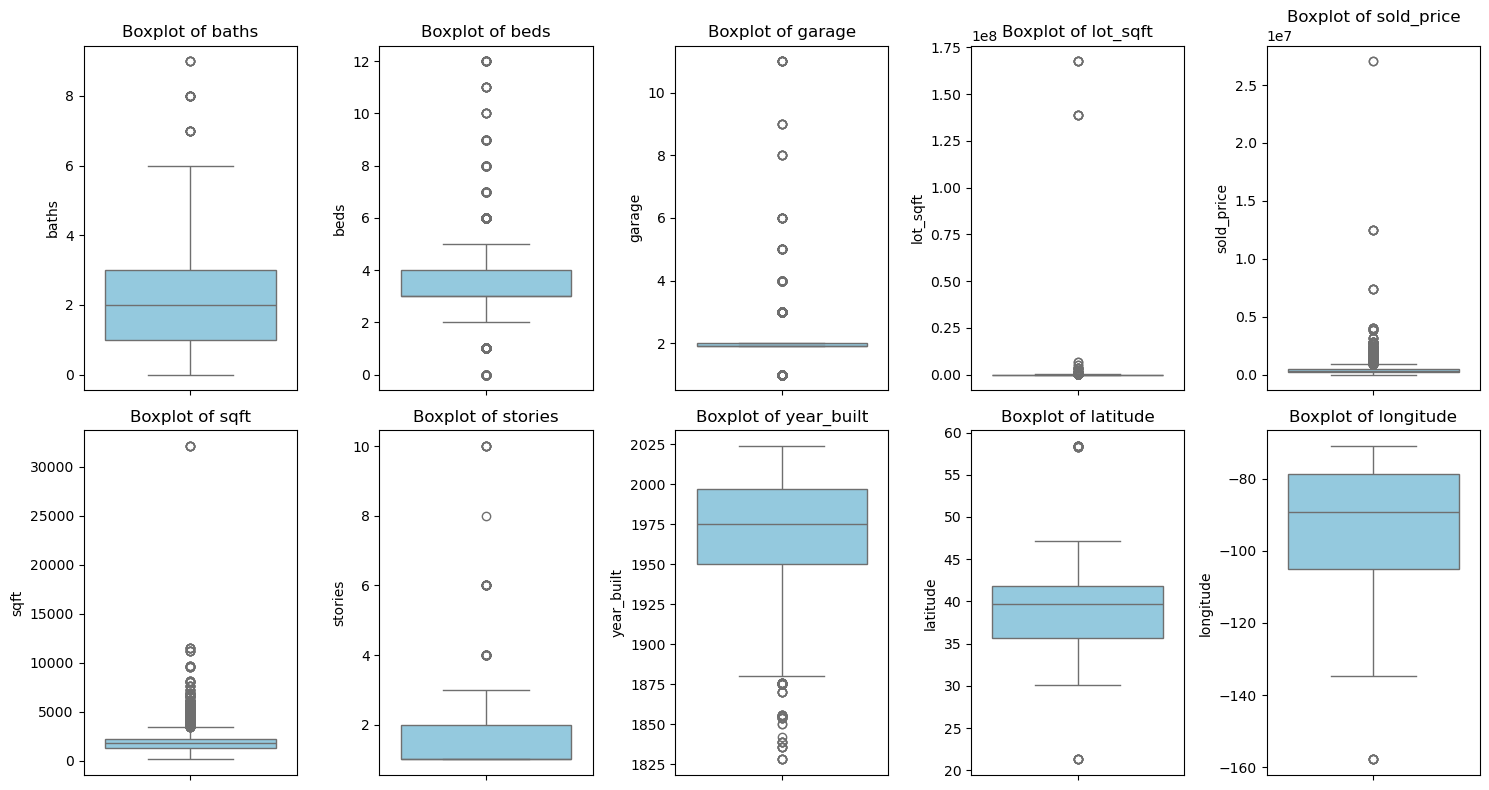

In [55]:
numeric_features = ['baths', 'beds', 'garage', 'lot_sqft', 'sold_price', 'sqft', 'stories', 'year_built', 'latitude', 'longitude']

# Create boxplots for each feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, (len(numeric_features) + 1) // 2, i + 1)
    sns.boxplot(y=df_cleaned[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

Remove Outliers

In [56]:
# Function to identify outliers using IQR
def identify_outliers(numeric_df, column):
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Select numeric columns to check
numeric_columns = ['baths', 'beds', 'garage', 'lot_sqft', 'sold_price', 'sqft', 'stories', 'year_built', 'latitude', 'longitude']

# Create a copy of the DataFrame
df_with_outliers_flag = new_df_cleaned.copy()

# Add an outlier flag column for each feature
for col in numeric_columns:
    df_with_outliers_flag[f'{col}_outlier'] = identify_outliers(df_with_outliers_flag, col)

# Display a summary of outlier counts per column
outlier_summary = {col: df_with_outliers_flag[f'{col}_outlier'].sum() for col in numeric_columns}
print("Outlier Counts per Feature:")
print(outlier_summary)

# Optionally, filter out rows with any outliers
# rows_without_outliers = df_with_outliers_flag[~df_with_outliers_flag[[f'{col}_outlier' for col in numeric_columns]].any(axis=1)]

# Show the resulting DataFrame with outlier flags
df_with_outliers_flag.head()

Outlier Counts per Feature:
{'baths': 27, 'beds': 639, 'garage': 1701, 'lot_sqft': 421, 'sold_price': 405, 'sqft': 526, 'stories': 48, 'year_built': 66, 'latitude': 22, 'longitude': 6}


,baths,beds,garage,lot_sqft,sold_price,sqft,stories,sub_type,type,year_built,...,baths_outlier,beds_outlier,garage_outlier,lot_sqft_outlier,sold_price_outlier,sqft_outlier,stories_outlier,year_built_outlier,latitude_outlier,longitude_outlier
0,2.000000,3.000000,1.000000,10454.000000,NaN,1821.000000,NaN,NaN,single_family,1963.0,...,False,False,True,False,False,False,False,False,True,False
1,2.131203,3.208289,1.926709,251094.946789,NaN,1933.848559,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2.131203,3.208289,1.926709,251094.946789,NaN,1933.848559,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2.131203,3.208289,1.926709,251094.946789,NaN,1933.848559,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,2.131203,3.208289,1.926709,251094.946789,NaN,1933.848559,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


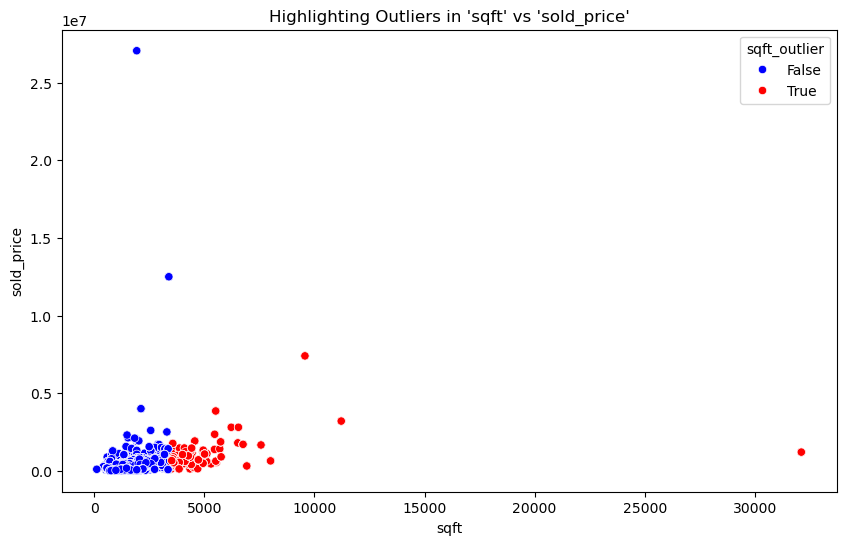

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_outliers_flag, x='sqft', y='sold_price', hue='sqft_outlier', palette={False: 'blue', True: 'red'})
plt.title("Highlighting Outliers in 'sqft' vs 'sold_price'")
plt.show()

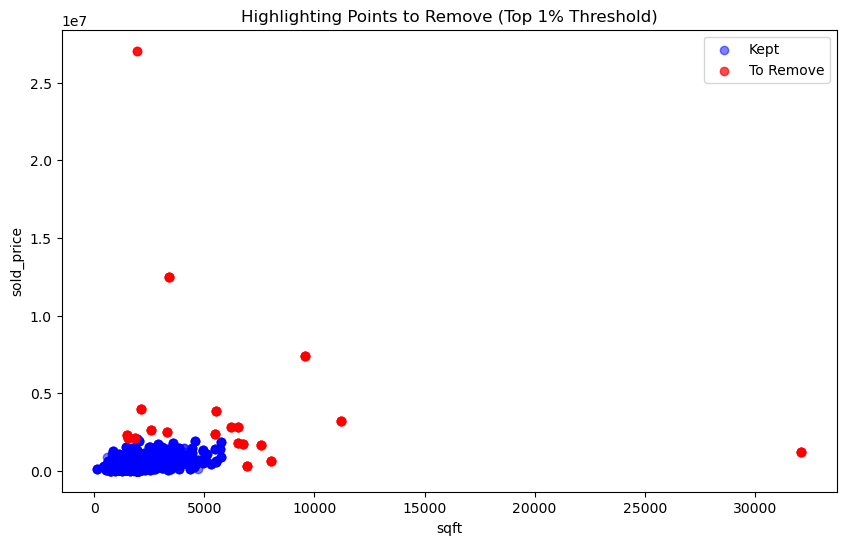

In [58]:
# Set thresholds
sqft_threshold = new_df_cleaned['sqft'].quantile(0.99)
sold_price_threshold = new_df_cleaned['sold_price'].quantile(0.99)

# Identify points to keep and remove
new_df_cleaned['to_remove'] = (new_df_cleaned['sqft'] > sqft_threshold) | (new_df_cleaned['sold_price'] > sold_price_threshold)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df_cleaned[new_df_cleaned['to_remove'] == False]['sqft'], new_df_cleaned[new_df_cleaned['to_remove'] == False]['sold_price'],
            label='Kept', color='blue', alpha=0.5)
plt.scatter(new_df_cleaned[new_df_cleaned['to_remove'] == True]['sqft'], new_df_cleaned[new_df_cleaned['to_remove'] == True]['sold_price'],
            label='To Remove', color='red', alpha=0.7)
plt.xlabel('sqft')
plt.ylabel('sold_price')
plt.title('Highlighting Points to Remove (Top 1% Threshold)')
plt.legend()
plt.show()

In [59]:
# Set a threshold (you can adjust these)
sqft_threshold = new_df_cleaned['sqft'].quantile(0.99)  # top 1% of sqft
sold_price_threshold = new_df_cleaned['sold_price'].quantile(0.99)  # top 1% of sold_price

# Filter the dataset
filtered_df = new_df_cleaned[(new_df_cleaned['sqft'] <= sqft_threshold) & (new_df_cleaned['sold_price'] <= sold_price_threshold)]

print(f"Original dataset size: {new_df_cleaned.shape}")
print(f"Filtered dataset size: {filtered_df.shape}")

Original dataset size: (8159, 34)
Filtered dataset size: (6620, 34)


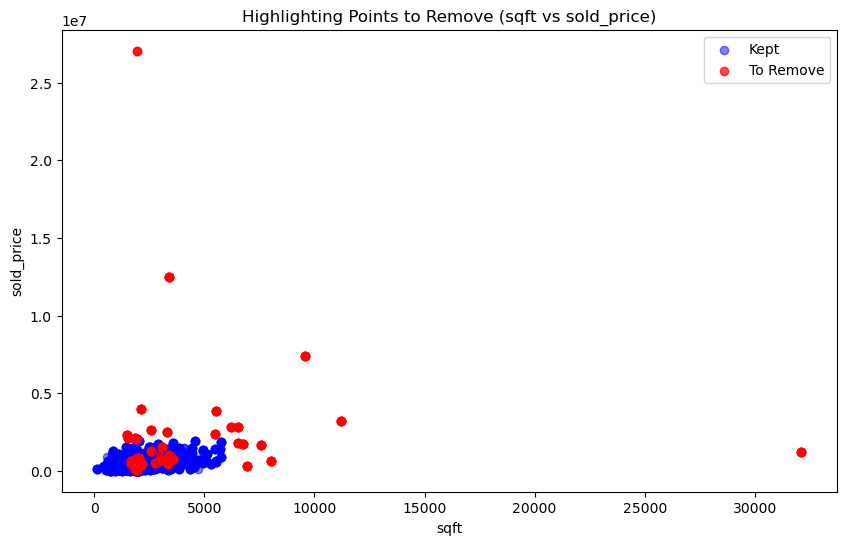

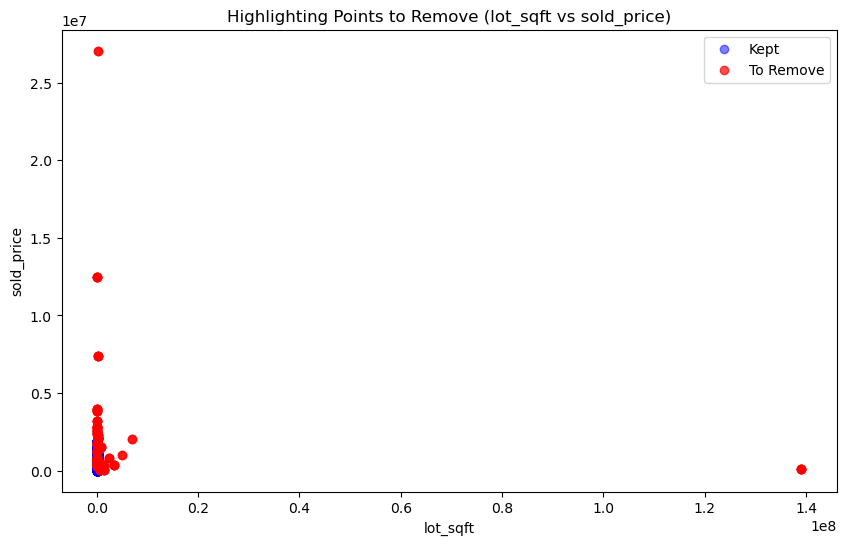

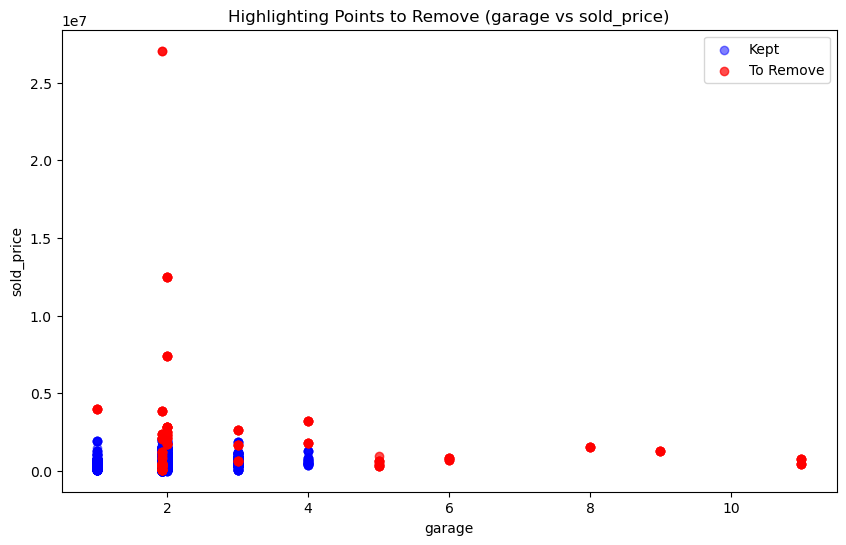

Original size: 8159 rows
New size after dropping: 8159 rows


In [60]:
# Set thresholds
thresholds = {
    'sqft': new_df_cleaned['sqft'].quantile(0.99),
    'sold_price': new_df_cleaned['sold_price'].quantile(0.99),
    'lot_sqft': new_df_cleaned['lot_sqft'].quantile(0.99),
    'garage': new_df_cleaned['garage'].quantile(0.99)
}

# Identify outliers
new_df_cleaned['to_remove'] = (
    (new_df_cleaned['sqft'] > thresholds['sqft']) |
    (new_df_cleaned['sold_price'] > thresholds['sold_price']) |
    (new_df_cleaned['lot_sqft'] > thresholds['lot_sqft']) |
    (new_df_cleaned['garage'] > thresholds['garage'])
)

# Plot highlighting points for each field
features = ['sqft', 'lot_sqft', 'garage']
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(new_df_cleaned[new_df_cleaned['to_remove'] == False][feature], new_df_cleaned[new_df_cleaned['to_remove'] == False]['sold_price'],
                label='Kept', color='blue', alpha=0.5)
    plt.scatter(new_df_cleaned[new_df_cleaned['to_remove'] == True][feature], new_df_cleaned[new_df_cleaned['to_remove'] == True]['sold_price'],
                label='To Remove', color='red', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('sold_price')
    plt.title(f'Highlighting Points to Remove ({feature} vs sold_price)')
    plt.legend()
    plt.show()

# Drop the outliers
cleaned_df = new_df_cleaned[new_df_cleaned['to_remove'] == False].drop(columns=['to_remove'])

output_path = "../data/processed/property_listings_cleaned.csv"
cleaned_df.to_csv(output_path, index=False)

print(f"Original size: {df.shape[0]} rows")
print(f"New size after dropping: {df_cleaned.shape[0]} rows")

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [65]:
from sklearn.preprocessing import StandardScaler



df = new_df_cleaned.copy()

target_column = "sold_price"

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Select numeric columns for scaling
num_cols = X_train.select_dtypes(include=["number"]).columns

# Scale numeric features
scaler = StandardScaler()
X_train_scaled_values = scaler.fit_transform(X_train[num_cols])
X_test_scaled_values = scaler.transform(X_test[num_cols])

# Replace numeric columns with scaled values
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = X_train_scaled_values

X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = X_test_scaled_values

# Save files

X_train_scaled.to_csv("../data/processed/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("../data/processed/X_test_scaled.csv", index=False)
y_train.to_frame().to_csv("../data/processed/y_train.csv", index=False)
y_test.to_frame().to_csv("../data/processed/y_test.csv", index=False)

print("✅ Saved scaled train/test splits with tags and EDA modifications.")

✅ Saved scaled train/test splits with tags and EDA modifications.
